In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
pos = np.random.normal(0,1,300000)
neg = np.random.normal(0,0.5,100000)
posW = np.ones(len(pos))
negW = -np.ones(len(neg))
tot = np.concatenate([pos,neg])
totW = np.concatenate([posW,negW])

In [3]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
x_vals = np.concatenate([tot,tot])
y_vals = np.concatenate([np.ones(len(tot)),np.zeros(len(tot))])
w_vals = np.concatenate([totW,np.ones(len(tot))])
X_train, X_val, Y_train, Y_val, W_train, W_val = train_test_split(x_vals, y_vals, w_vals, test_size=0.5)

In [5]:
myhistory = model.fit(x_vals, y_vals, sample_weight=w_vals,epochs=10,validation_data=(X_val, Y_val, W_val),batch_size=int(0.1*len(X_train)),verbose=1,shuffle=True)


Train on 800000 samples, validate on 400000 samples
Epoch 1/10
800000/800000 [==============================] - 3s 4us/step - loss: 0.5005 - accuracy: 0.5000 - val_loss: 0.4805 - val_accuracy: 0.5000
Epoch 2/10
800000/800000 [==============================] - 2s 3us/step - loss: 0.4602 - accuracy: 0.5001 - val_loss: 0.4561 - val_accuracy: 0.4993
Epoch 3/10
800000/800000 [==============================] - 2s 3us/step - loss: 0.4532 - accuracy: 0.5000 - val_loss: 0.4556 - val_accuracy: 0.4996
Epoch 4/10
800000/800000 [==============================] - 2s 3us/step - loss: 0.4528 - accuracy: 0.4999 - val_loss: 0.4554 - val_accuracy: 0.4996
Epoch 5/10
800000/800000 [==============================] - 2s 3us/step - loss: 0.4528 - accuracy: 0.5000 - val_loss: 0.4553 - val_accuracy: 0.4995
Epoch 6/10
800000/800000 [==============================] - 2s 3us/step - loss: 0.4527 - accuracy: 0.5000 - val_loss: 0.4553 - val_accuracy: 0.4997
Epoch 7/10
800000/800000 [==============================] -

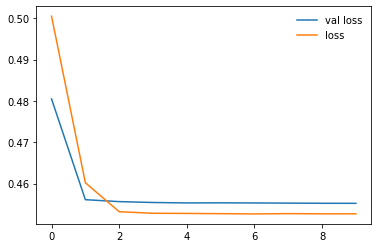

In [6]:
plt.plot(myhistory.history['val_loss'],label="val loss")
plt.plot(myhistory.history['loss'],label="loss")
plt.legend(frameon=False)

In [7]:
predicted_w = model.predict(X_val)

In [8]:
myw = predicted_w / (1.-predicted_w)

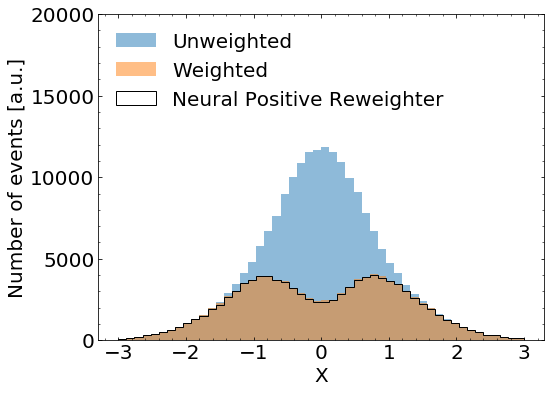

In [14]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

_,_,_=plt.hist(X_val[Y_val==0],bins=np.linspace(-3,3,51),alpha=0.5,label="Unweighted")
_,_,_=plt.hist(X_val[Y_val==1],weights=W_val[Y_val==1],bins=np.linspace(-3,3,51),alpha=0.5,label="Weighted")
_,_,_=plt.hist(X_val[Y_val==0],weights=myw[Y_val==0],bins=np.linspace(-3,3,51),label="Neural Positive Reweighter",histtype="step",color="black")
plt.legend(frameon=False,fontsize=20,loc="upper left")
plt.ylim([0,20000])
plt.ylabel("Number of events [a.u.]",fontsize=20)
plt.xlabel("X",fontsize=20)
plt.locator_params(axis='y', nbins=6)
plt.savefig("gauss.pdf",bbox_inches='tight')

In [10]:
from scipy.stats import norm
def analytic_weight(x):
    gaus1 = norm.pdf(x)*3
    gaus2 = norm.pdf(x,scale=0.5)
    #pos = np.random.normal(0,1,300000)
    #neg = np.random.normal(0,0.5,100000)
    return (gaus1-gaus2)/(gaus1+gaus2)

In [11]:
analytic_weights = analytic_weight(X_val)

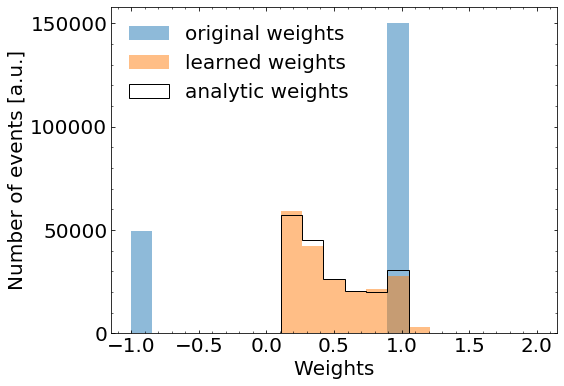

In [12]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(W_val[Y_val==1],label="original weights",alpha=0.5,bins=np.linspace(-1,2,20))
plt.hist(myw[Y_val==0],label="learned weights",alpha=0.5,bins=np.linspace(-1,2,20))
plt.hist(analytic_weights[Y_val==0],label="analytic weights",color="black",histtype="step",bins=np.linspace(-1,2,20))
plt.legend(frameon=False,fontsize=20)
plt.xlabel(r"Weights",fontsize=20)
plt.ylabel(r"Number of events [a.u.]",fontsize=20)
plt.locator_params(axis='y', nbins=6)
plt.savefig("wgauss.pdf",bbox_inches='tight')